In [9]:
# import os
# import shutil
# import random

# # Define input and output directories
# input_dir = r'C:\Users\User\Documents\Graduate certificate\CS5260 Neural Network and Deep Learning II\Projecct\brain_tumor_img_segmentation-master\brain_tumor_img_segmentation-master\datasets\classification\train'
# output_dir = r'C:\Users\User\Documents\Graduate certificate\CS5260 Neural Network and Deep Learning II\Projecct\brain_tumor_img_segmentation-master\brain_tumor_img_segmentation-master\datasets\classification\sampled_train'

# # Create output directory if it doesn't exist
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)

#     # Define labels
#     labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

#     # Define number of samples to take from each label
#     num_samples = 100

#     # Loop through each label
#     for label in labels:
#         # Create label directory in the output directory
#         label_output_dir = os.path.join(output_dir, label)
#         if not os.path.exists(label_output_dir):
#             os.makedirs(label_output_dir)
        
#         # Get list of all images for the current label
#         label_input_dir = os.path.join(input_dir, label)
#         images = os.listdir(label_input_dir)
        
#         # Sample 'num_samples' images randomly
#         sampled_images = random.sample(images, num_samples)
        
#         # Copy sampled images to the output directory
#         for image in sampled_images:
#             src = os.path.join(label_input_dir, image)
#             dst = os.path.join(label_output_dir, image)
#             shutil.copy(src, dst)

#     print("Sampling completed successfully.")

# # Define input and output directories
# input_dir = r'C:\Users\User\Documents\Graduate certificate\CS5260 Neural Network and Deep Learning II\Projecct\brain_tumor_img_segmentation-master\brain_tumor_img_segmentation-master\datasets\classification\test'
# output_dir = r'C:\Users\User\Documents\Graduate certificate\CS5260 Neural Network and Deep Learning II\Projecct\brain_tumor_img_segmentation-master\brain_tumor_img_segmentation-master\datasets\classification\sampled_test'

# # Create output directory if it doesn't exist
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)

#     # Define labels
#     labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

#     # Define number of samples to take from each label
#     num_samples = 20

#     # Loop through each label
#     for label in labels:
#         # Create label directory in the output directory
#         label_output_dir = os.path.join(output_dir, label)
#         if not os.path.exists(label_output_dir):
#             os.makedirs(label_output_dir)
        
#         # Get list of all images for the current label
#         label_input_dir = os.path.join(input_dir, label)
#         images = os.listdir(label_input_dir)
        
#         # Sample 'num_samples' images randomly
#         sampled_images = random.sample(images, num_samples)
        
#         # Copy sampled images to the output directory
#         for image in sampled_images:
#             src = os.path.join(label_input_dir, image)
#             dst = os.path.join(label_output_dir, image)
#             shutil.copy(src, dst)

#     print("Sampling completed successfully.")
    
# # Define input and output directories
# input_dir = r'C:\Users\User\Documents\Graduate certificate\CS5260 Neural Network and Deep Learning II\Projecct\brain_tumor_img_segmentation-master\brain_tumor_img_segmentation-master\datasets\classification\validation'
# output_dir = r'C:\Users\User\Documents\Graduate certificate\CS5260 Neural Network and Deep Learning II\Projecct\brain_tumor_img_segmentation-master\brain_tumor_img_segmentation-master\datasets\classification\sampled_validation'

# # Create output directory if it doesn't exist
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)

#     # Define labels
#     labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

#     # Define number of samples to take from each label
#     num_samples = 20

#     # Loop through each label
#     for label in labels:
#         # Create label directory in the output directory
#         label_output_dir = os.path.join(output_dir, label)
#         if not os.path.exists(label_output_dir):
#             os.makedirs(label_output_dir)
        
#         # Get list of all images for the current label
#         label_input_dir = os.path.join(input_dir, label)
#         images = os.listdir(label_input_dir)
        
#         # Sample 'num_samples' images randomly
#         sampled_images = random.sample(images, num_samples)
        
#         # Copy sampled images to the output directory
#         for image in sampled_images:
#             src = os.path.join(label_input_dir, image)
#             dst = os.path.join(label_output_dir, image)
#             shutil.copy(src, dst)

#     print("Sampling completed successfully.")

Sampling completed successfully.
Sampling completed successfully.
Sampling completed successfully.


In [3]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from network_helper import init_weights
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torch.optim as optim
from VanillaUnet import unet_2D
# Define dataset directory
dataset_dir = r'C:\Users\User\Documents\Graduate certificate\CS5260 Neural Network and Deep Learning II\Projecct\brain_tumor_img_segmentation-master\brain_tumor_img_segmentation-master\datasets\classification'
# Define batch size and image dimensions
batch_size = 32
image_size = 256

# Define data transformations
data_transforms = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Assuming 3 channels for RGB images
])
# Load sampled dataset
train_dataset = ImageFolder(root=os.path.join(dataset_dir, 'sampled_train'), transform=data_transforms)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

validation_dataset = ImageFolder(root=os.path.join(dataset_dir, 'sampled_validation'), transform=data_transforms)
validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)

test_dataset = ImageFolder(root=os.path.join(dataset_dir, 'sampled_test'), transform=data_transforms)
test_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)

# Define VanillaUnet model
model = unet_2D(mode='classification')  # Assuming 4 classes (glioma, meningioma, notumor, pituitary)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs, reconstructions = model(images)
        loss = criterion(outputs, labels)
        loss += 0.5 * torch.mean((reconstructions - images)**2)  # Reconstruction loss
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
    
    epoch_loss = running_loss / len(train_dataset)
    
    # Validation
    model.eval()
    val_running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in validation_loader:
            images, labels = images.to(device), labels.to(device)
            outputs, _ = model(images)
            val_loss = criterion(outputs, labels)
            val_running_loss += val_loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
    val_epoch_loss = val_running_loss / len(validation_dataset)
    val_accuracy = 100 * correct / total
    
    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {epoch_loss:.4f}, Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

# Once training is complete, evaluate on test set
test_loss = 0
test_running_loss=0
test_accuracy = 0
num_batches = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs, _ = model(images)
        test_loss = criterion(outputs, labels)
        test_running_loss += test_loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    test_loss = test_running_loss / len(validation_dataset)
    test_accuracy = 100 * correct / total

# Save the trained model
torch.save(model.state_dict(), 'classification_model.pth')

c:\Users\User\Documents\Graduate certificate\CS5260 Neural Network and Deep Learning II\Projecct\brain_tumor_img_segmentation-master\brain_tumor_img_segmentation-master\models\network_helper.py:34: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  init.kaiming_normal(m.weight.data, a=0, mode='fan_in')
c:\Users\User\Documents\Graduate certificate\CS5260 Neural Network and Deep Learning II\Projecct\brain_tumor_img_segmentation-master\brain_tumor_img_segmentation-master\models\network_helper.py:38: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(m.weight.data, 1.0, 0.02)
c:\Users\User\Documents\Graduate certificate\CS5260 Neural Network and Deep Learning II\Projecct\brain_tumor_img_segmentation-master\brain_tumor_img_segmentation-master\models\network_helper.py:39: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  init.constant(m.bias.data, 0.0)


Epoch 1/10, Training Loss: 1.0851, Validation Loss: 2.3190, Validation Accuracy: 40.00%
Epoch 2/10, Training Loss: 0.8733, Validation Loss: 1.2649, Validation Accuracy: 61.25%


In [ ]:
# import os
# import shutil
# import random
# # segmentation\train\images\no-tumour
# # Set the paths
# file_src = "train"
# file_dest = "sampled_train"
# root_dir = 'C:\\Users\\User\\Documents\\Graduate certificate\\CS5260 Neural Network and Deep Learning II\\Projecct\\brain_tumor_img_segmentation-master\\brain_tumor_img_segmentation-master\\datasets\\segmentation'
# image_dir = os.path.join(root_dir,file_src, 'images')
# mask_dir = os.path.join(root_dir,file_src, 'masks')
# sampled_image_dir = os.path.join(root_dir,file_dest, 'images')
# sampled_mask_dir = os.path.join(root_dir,file_dest, 'masks')

# # Create the sampled_train directory if it doesn't exist
# if not os.path.exists(sampled_image_dir):
#     os.makedirs(sampled_image_dir)
#     os.makedirs(sampled_mask_dir)
        
#     for subdir in os.listdir(image_dir):
#         # Create the sampled_train directory if it doesn't exist
#         if not os.path.exists(os.path.join(sampled_image_dir,subdir)):
#             os.makedirs(os.path.join(sampled_image_dir,subdir))
#         if not os.path.exists(os.path.join(sampled_mask_dir,subdir)):
#             os.makedirs(os.path.join(sampled_mask_dir,subdir))


#         # Define the subset size
#         subset_size = 100  # Change this to the desired subset size
#         # Get all image filenames
#         image_filenames = os.listdir(os.path.join(image_dir,subdir))

#         # Sample a subset of filenames
#         subset_filenames = random.sample(image_filenames, subset_size)

#         # Copy the sampled images and masks to the sampled_train directory
#         for filename in subset_filenames:
#             print(filename)
#             image_path = os.path.join(image_dir,subdir, filename)
#             mask_path = os.path.join(mask_dir, subdir,filename)
#             shutil.copy(image_path, os.path.join(sampled_image_dir,subdir))
#             shutil.copy(mask_path, os.path.join(sampled_mask_dir,subdir))
            

# file_src = "test"
# file_dest = "sampled_test"
# root_dir = 'C:\\Users\\User\\Documents\\Graduate certificate\\CS5260 Neural Network and Deep Learning II\\Projecct\\brain_tumor_img_segmentation-master\\brain_tumor_img_segmentation-master\\datasets\\segmentation'
# image_dir = os.path.join(root_dir,file_src, 'images')
# mask_dir = os.path.join(root_dir,file_src, 'masks')
# sampled_image_dir = os.path.join(root_dir,file_dest, 'images')
# sampled_mask_dir = os.path.join(root_dir,file_dest, 'masks')

# # Create the sampled_train directory if it doesn't exist
# if not os.path.exists(sampled_image_dir):
#     os.makedirs(sampled_image_dir)
#     os.makedirs(sampled_mask_dir)
        
#     for subdir in os.listdir(image_dir):
#         # Create the sampled_train directory if it doesn't exist
#         if not os.path.exists(os.path.join(sampled_image_dir,subdir)):
#             os.makedirs(os.path.join(sampled_image_dir,subdir))
#         if not os.path.exists(os.path.join(sampled_mask_dir,subdir)):
#             os.makedirs(os.path.join(sampled_mask_dir,subdir))


#         # Define the subset size
#         subset_size = 20  # Change this to the desired subset size
#         # Get all image filenames
#         image_filenames = os.listdir(os.path.join(image_dir,subdir))

#         # Sample a subset of filenames
#         subset_filenames = random.sample(image_filenames, subset_size)

#         # Copy the sampled images and masks to the sampled_train directory
#         for filename in subset_filenames:
#             print(filename)
#             image_path = os.path.join(image_dir,subdir, filename)
#             mask_path = os.path.join(mask_dir, subdir,filename)
#             shutil.copy(image_path, os.path.join(sampled_image_dir,subdir))
#             shutil.copy(mask_path, os.path.join(sampled_mask_dir,subdir))
            
            
# file_src = "validation"
# file_dest = "sampled_validation"
# root_dir = 'C:\\Users\\User\\Documents\\Graduate certificate\\CS5260 Neural Network and Deep Learning II\\Projecct\\brain_tumor_img_segmentation-master\\brain_tumor_img_segmentation-master\\datasets\\segmentation'
# image_dir = os.path.join(root_dir,file_src, 'images')
# mask_dir = os.path.join(root_dir,file_src, 'masks')
# sampled_image_dir = os.path.join(root_dir,file_dest, 'images')
# sampled_mask_dir = os.path.join(root_dir,file_dest, 'masks')

# # Create the sampled_train directory if it doesn't exist
# if not os.path.exists(sampled_image_dir):
#     os.makedirs(sampled_image_dir)
#     os.makedirs(sampled_mask_dir)
        
#     for subdir in os.listdir(image_dir):
#         # Create the sampled_train directory if it doesn't exist
#         if not os.path.exists(os.path.join(sampled_image_dir,subdir)):
#             os.makedirs(os.path.join(sampled_image_dir,subdir))
#         if not os.path.exists(os.path.join(sampled_mask_dir,subdir)):
#             os.makedirs(os.path.join(sampled_mask_dir,subdir))


#         # Define the subset size
#         subset_size = 20  # Change this to the desired subset size
#         # Get all image filenames
#         image_filenames = os.listdir(os.path.join(image_dir,subdir))

#         # Sample a subset of filenames
#         subset_filenames = random.sample(image_filenames, subset_size)

#         # Copy the sampled images and masks to the sampled_train directory
#         for filename in subset_filenames:
#             print(filename)
#             image_path = os.path.join(image_dir,subdir, filename)
#             mask_path = os.path.join(mask_dir, subdir,filename)
#             shutil.copy(image_path, os.path.join(sampled_image_dir,subdir))
#             shutil.copy(mask_path, os.path.join(sampled_mask_dir,subdir))

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\User\Documents\Graduate certificate\CS5260 Neural Network and Deep Learning II\Projecct\brain_tumor_img_segmentation-master\brain_tumor_img_segmentation-master\models\network_helper.py:34: UserWarning: nn.init.kaiming_normal is now deprecated 

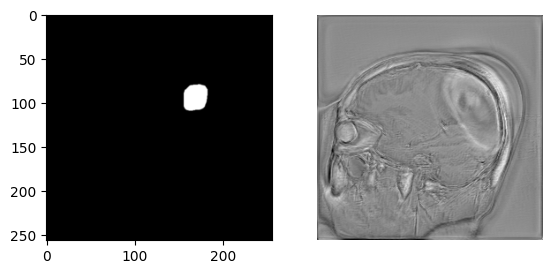

Epoch 1/10, Training Loss: 0.0089, Validation Loss: 0.0149


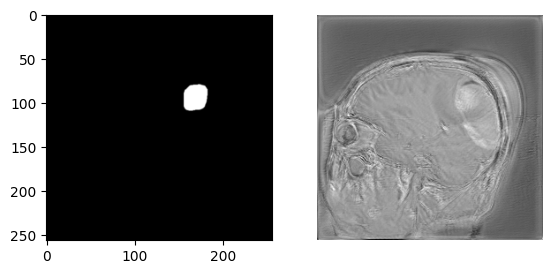

Epoch 2/10, Training Loss: 0.0023, Validation Loss: 0.0129


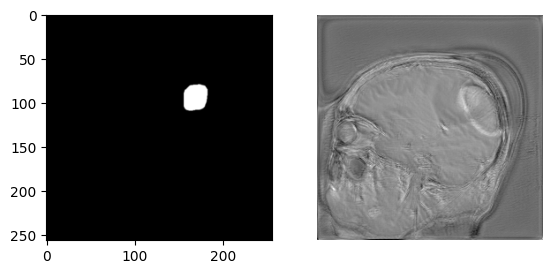

Epoch 3/10, Training Loss: 0.0022, Validation Loss: 0.0117


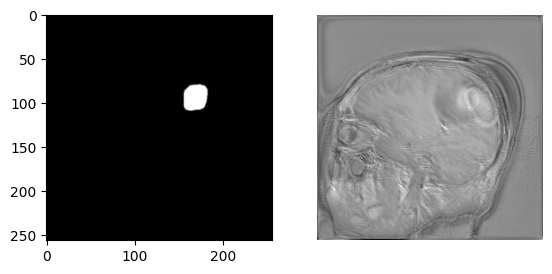

Epoch 4/10, Training Loss: 0.0021, Validation Loss: 0.0115


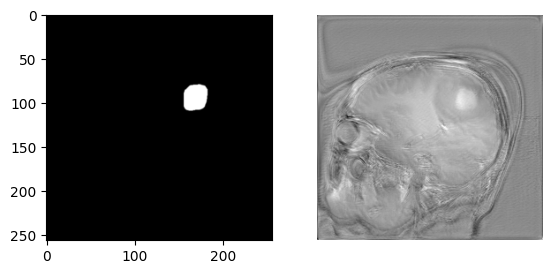

Epoch 5/10, Training Loss: 0.0020, Validation Loss: 0.0112


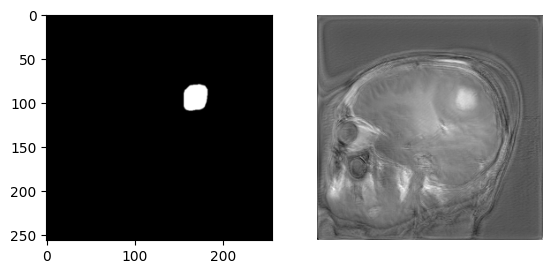

Epoch 6/10, Training Loss: 0.0019, Validation Loss: 0.0111


KeyboardInterrupt: 

In [1]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
from network_helper import init_weights
import torchvision.transforms as transforms
import torch.optim as optim
from VanillaUnet import unet_2D
import matplotlib.pyplot as plt

class BrainTumorDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_dir = os.path.join(root_dir, 'images')
        self.mask_dir = os.path.join(root_dir, 'masks')
        self.image_paths = self._get_paths(self.image_dir)
        self.mask_paths = self._get_paths(self.mask_dir)

    def _get_paths(self, directory):
        paths = []
        for subdir in os.listdir(directory):
            subdir_path = os.path.join(directory, subdir)
            if os.path.isdir(subdir_path):
                for filename in os.listdir(subdir_path):
                    paths.append(os.path.join(subdir_path, filename))
        return paths

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        mask_path = self.mask_paths[idx]
        image = Image.open(img_path).convert('RGB')
        mask = Image.open(mask_path).convert('L')  # Convert to grayscale
        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)
        return image, mask

# Define transforms
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# Initialize dataset and dataloaders
train_dataset = BrainTumorDataset(root_dir='C:\\Users\\User\\Documents\\Graduate certificate\\CS5260 Neural Network and Deep Learning II\\Projecct\\brain_tumor_img_segmentation-master\\brain_tumor_img_segmentation-master\\datasets\\segmentation\\sampled_train',
                                  transform=transform)
test_dataset = BrainTumorDataset(root_dir='C:\\Users\\User\\Documents\\Graduate certificate\\CS5260 Neural Network and Deep Learning II\\Projecct\\brain_tumor_img_segmentation-master\\brain_tumor_img_segmentation-master\\datasets\\segmentation\\sampled_test',
                                 transform=transform)
val_dataset = BrainTumorDataset(root_dir='C:\\Users\\User\\Documents\\Graduate certificate\\CS5260 Neural Network and Deep Learning II\\Projecct\\brain_tumor_img_segmentation-master\\brain_tumor_img_segmentation-master\\datasets\\segmentation\\sampled_validation',
                                transform=transform)

# Define dataloaders
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)

# Define VanillaUnet model
model = unet_2D(mode='segmentation')  # Assuming 4 classes (glioma, meningioma, notumor, pituitary)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch in train_loader:
        images, masks = batch
        images, masks = images.to(device), masks.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(images)

        # image_plot = masks[0,0].numpy()  # Assuming images are grayscale
        # plt.subplot(1, 2, 1)  # Adjust subplot layout for multiple images
        # plt.imshow(image_plot, cmap='gray')
        # image_plot = outputs[0,0].detach().numpy()  # Assuming images are grayscale
        # plt.subplot(1, 2, 2)  # Adjust subplot layout for multiple images
        # plt.imshow(image_plot, cmap='gray')
        # plt.axis('off')
        # plt.show()
        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() 
        # print(loss.item() ,running_loss)
    
    epoch_loss = running_loss / len(train_dataset)
    
    # Validation
    model.eval()
    val_running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in val_loader:
            images, masks = batch
            images, masks = images.to(device), masks.to(device)
            outputs = model(images)
            val_loss = criterion(outputs, masks)
            val_running_loss += val_loss.item() * images.size(0)
                
            image_plot1 = masks[0,0].numpy()  # Assuming images are grayscale
            image_plot2 = outputs[0,0].detach().numpy()  # Assuming images are grayscale
        plt.subplot(1, 2, 1)  # Adjust subplot layout for multiple images
        plt.imshow(image_plot1, cmap='gray')
        plt.subplot(1, 2, 2)  # Adjust subplot layout for multiple images
        plt.imshow(image_plot2, cmap='gray')
        plt.axis('off')
        plt.show()
    val_epoch_loss = val_running_loss / len(val_dataset)
    
    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {epoch_loss:.4f}, Validation Loss: {val_epoch_loss:.4f}")

